In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [70]:
pd.set_option('display.max_columns', None)

In [71]:
pd.set_option('display.max_rows', 201)

In [72]:
Set_Data = pd.read_csv('/Set_Data.csv')

In [73]:
GGST_Data = pd.read_csv('/GGST_Tournament_Data_Cleaned.csv')

In [74]:
Set_Data.shape

(294063, 13)

In [75]:
GGST_Data.shape

(10239, 12)

In [76]:
GGST_Data.head(5)

,Unnamed: 0,event id,event entrants,event game,tournament_id,tournament name,tournament city,tournament state,tournament country,tournament start timestamp,tournament online,tournament num attendees
0,0,1096478,61,Guilty Gear: Strive,647597,Fightsticks & Flashkicks GGST Weekly #65,Online,Online,Online,2024-03-14 19:30,True,61
1,1,1090628,10,Guilty Gear: Strive,644687,Neon Dreams Guilty Gear Strive Thursday Throwd...,Largo,FL,US,2024-03-14 19:00,False,10
2,2,1095577,2,Guilty Gear: Strive,647168,Thursday Beat-Downs #76,Fargo,ND,US,2024-03-14 18:30,False,5
3,3,1080297,8,Guilty Gear: Strive,639432,Thursday Throwdown 88| @The Hub,Milwaukee,WI,US,2024-03-14 18:00,False,48
4,4,1088281,0,Guilty Gear: Strive,643470,Thursday Throwdown #19 | XP412,Albion,MI,US,2024-03-14 18:00,False,1


In [77]:
Set_Data.head(5)

,event id,set id,loser placement,winner placement,winner id,player 1 id,player 1 name,player 1 seed,player 1 victory,player 2 id,player 2 name,player 2 seed,player 2 victory
0,1096478,72040059,2,1,15974810.0,15974810,Mikesaftig,3,True,15976262,9Moons | TestYourLuck,1,False
1,1096478,72040074,3,2,15976262.0,15976262,9Moons | TestYourLuck,1,True,15976356,Kensei,2,False
2,1096478,72040073,4,3,15976356.0,15976356,Kensei,2,True,15968352,OEG | Ya Boi Squanto,6,False
3,1096478,72040072,5,4,15968352.0,15971253,Kaneda,4,False,15968352,OEG | Ya Boi Squanto,6,True
4,1096478,72040071,5,3,15976356.0,15976356,Kensei,2,True,15970429,Bark/NH | Fat,5,False


In [78]:
GGST_Combined = pd.merge(Set_Data, GGST_Data, on='event id', how='left')

In [79]:
GGST_Combined.dtypes

event id                        int64
set id                          int64
loser placement                 int64
winner placement                int64
winner id                     float64
player 1 id                     int64
player 1 name                  object
player 1 seed                   int64
player 1 victory                 bool
player 2 id                     int64
player 2 name                  object
player 2 seed                   int64
player 2 victory                 bool
Unnamed: 0                      int64
event entrants                  int64
event game                     object
tournament_id                   int64
tournament name                object
tournament city                object
tournament state               object
tournament country             object
tournament start timestamp     object
tournament online                bool
tournament num attendees        int64
dtype: object

In [80]:
GGST_Combined.shape

(294063, 24)

In [81]:
# Filter rows where one player is 'p0pcat' and the other is 'razzo'
matches_between_players = GGST_Combined[
    ((GGST_Combined['player 1 name'].str.contains('p0pcat', case=False, na=False)) & (GGST_Combined['player 2 name'].str.contains('razzo', case=False, na=False))) |
    ((GGST_Combined['player 1 name'].str.contains('razzo', case=False, na=False)) & (GGST_Combined['player 2 name'].str.contains('p0pcat', case=False, na=False)))
]

# Display the rows where these players played against each other
matches_between_players




,event id,set id,loser placement,winner placement,winner id,player 1 id,player 1 name,player 1 seed,player 1 victory,player 2 id,player 2 name,player 2 seed,player 2 victory,Unnamed: 0,event entrants,event game,tournament_id,tournament name,tournament city,tournament state,tournament country,tournament start timestamp,tournament online,tournament num attendees
113837,864724,63572310,193,33,13638272.0,13638272,FLY | M.RAGE | Razzo,78,True,13180405,p0pcat,179,False,4161,2474,Guilty Gear: Strive,523946,Evo 2023,Las Vegas,NV,US,2023-08-04 10:00,False,11064


In [82]:
GGST_Combined.sample(30)

,event id,set id,loser placement,winner placement,winner id,player 1 id,player 1 name,player 1 seed,player 1 victory,player 2 id,player 2 name,player 2 seed,player 2 victory,Unnamed: 0,event entrants,event game,tournament_id,tournament name,tournament city,tournament state,tournament country,tournament start timestamp,tournament online,tournament num attendees
104999,872769,64318447,33,13,13937908.0,13937908,bread boy | BuriRoll,27,True,13069548,Thegoras,38,False,3826,50,Guilty Gear: Strive,528389,Floating Point,Bankstown,NSW,AU,2023-08-25 02:00,False,476
4406,1091342,71717737,3,2,15885791.0,15869159,Alex,4,False,15885791,PullUpOnAKid,2,True,137,7,Guilty Gear: Strive,645014,Masher Mayhem #57,Isla Vista,CA,US,2024-03-06 21:30,False,17
93450,978106,65013065,129,65,14231282.0,14231282,yeji,202,True,14228267,PW | Kyoshi,159,False,3411,240,Guilty Gear: Strive,586465,TNS Guilty Gear Strive #89 (Crossplay),Online,Online,Online,2023-09-11 19:00,True,240
150121,842625,60815576,193,129,12461194.0,12461194,Young_Lz_23,94,True,12904724,Polybius,607,False,5337,1063,Guilty Gear: Strive,501094,COMBO BREAKER 2023,Schaumburg,IL,US,2023-05-26 10:00,False,3426
10904,1079900,71154533,17,13,15760972.0,15761428,Rebix,16,False,15760972,MrBorif,17,True,379,18,Guilty Gear: Strive,639226,Battle of the Gears #11,Online,Online,Online,2024-02-23 18:30,True,18
170507,893233,59417522,5,1,12890345.0,12890345,JRU | Voltiyon,1,True,12894902,haruko,5,False,6077,30,Guilty Gear: Strive,539644,Colorado Akihabara Arcade Anime Sunday 4/16,Westminster,CO,US,2023-04-16 19:00,False,40
202114,867391,57643703,47,10,12503836.0,12503836,daze,41,True,12481245,Gutz,12,False,7063,141,Guilty Gear: Strive,525424,RUN IT THURSDAYS #32 - Guilty Gear -Strive-,Online,Online,Online,2023-03-02 18:00,True,208
94261,966483,64961591,7,2,14207339.0,14207339,974 | Mawado,3,True,14011800,MG13 | Nino_Freecss,6,False,3434,13,Guilty Gear: Strive,580388,Pranking 1.01,Port-de-Bouc,Provence-Alpes-Côte d'Azur,FR,2023-09-10 03:00,False,18
59297,1005109,67575131,25,2,14777070.0,14783679,darverado,6,False,14777070,OEG | SimplyRift,27,True,2088,29,Guilty Gear: Strive,600803,CptnHawkeye's Beginner Beatdown 49,Online,Online,Online,2023-11-11 19:00,True,29
2885,1075474,71788555,17,9,15911534.0,15911534,Diddy,11,True,15912024,AMOUG,22,False,100,25,Guilty Gear: Strive,637102,York Street Battles #93,Sydney,NSW,AU,2024-03-08 20:30,False,152


In [83]:
list(GGST_Combined.columns)


['event id',
 'set id',
 'loser placement',
 'winner placement',
 'winner id',
 'player 1 id',
 'player 1 name',
 'player 1 seed',
 'player 1 victory',
 'player 2 id',
 'player 2 name',
 'player 2 seed',
 'player 2 victory',
 'Unnamed: 0',
 'event entrants',
 'event game',
 'tournament_id',
 'tournament name',
 'tournament city',
 'tournament state',
 'tournament country',
 'tournament start timestamp',
 'tournament online',
 'tournament num attendees']

In [84]:
# to datetime
GGST_Combined['tournament start timestamp'] = pd.to_datetime(GGST_Combined['tournament start timestamp'])

# remove extra column
GGST_Combined = GGST_Combined.drop(columns=['Unnamed: 0'])

GGST_Combined.head()


,event id,set id,loser placement,winner placement,winner id,player 1 id,player 1 name,player 1 seed,player 1 victory,player 2 id,player 2 name,player 2 seed,player 2 victory,event entrants,event game,tournament_id,tournament name,tournament city,tournament state,tournament country,tournament start timestamp,tournament online,tournament num attendees
0,1096478,72040059,2,1,15974810.0,15974810,Mikesaftig,3,True,15976262,9Moons | TestYourLuck,1,False,61,Guilty Gear: Strive,647597,Fightsticks & Flashkicks GGST Weekly #65,Online,Online,Online,2024-03-14 19:30:00,True,61
1,1096478,72040074,3,2,15976262.0,15976262,9Moons | TestYourLuck,1,True,15976356,Kensei,2,False,61,Guilty Gear: Strive,647597,Fightsticks & Flashkicks GGST Weekly #65,Online,Online,Online,2024-03-14 19:30:00,True,61
2,1096478,72040073,4,3,15976356.0,15976356,Kensei,2,True,15968352,OEG | Ya Boi Squanto,6,False,61,Guilty Gear: Strive,647597,Fightsticks & Flashkicks GGST Weekly #65,Online,Online,Online,2024-03-14 19:30:00,True,61
3,1096478,72040072,5,4,15968352.0,15971253,Kaneda,4,False,15968352,OEG | Ya Boi Squanto,6,True,61,Guilty Gear: Strive,647597,Fightsticks & Flashkicks GGST Weekly #65,Online,Online,Online,2024-03-14 19:30:00,True,61
4,1096478,72040071,5,3,15976356.0,15976356,Kensei,2,True,15970429,Bark/NH | Fat,5,False,61,Guilty Gear: Strive,647597,Fightsticks & Flashkicks GGST Weekly #65,Online,Online,Online,2024-03-14 19:30:00,True,61


In [85]:
print(GGST_Combined.isnull().sum())

print(GGST_Combined.info())

event id                        0
set id                          0
loser placement                 0
winner placement                0
winner id                     569
player 1 id                     0
player 1 name                  14
player 1 seed                   0
player 1 victory                0
player 2 id                     0
player 2 name                  14
player 2 seed                   0
player 2 victory                0
event entrants                  0
event game                      0
tournament_id                   0
tournament name                 0
tournament city                 0
tournament state                0
tournament country              0
tournament start timestamp      0
tournament online               0
tournament num attendees        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294063 entries, 0 to 294062
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                  

In [86]:
# any nulls
null_data = GGST_Combined[GGST_Combined.isnull().any(axis=1)]

null_data

,event id,set id,loser placement,winner placement,winner id,player 1 id,player 1 name,player 1 seed,player 1 victory,player 2 id,player 2 name,player 2 seed,player 2 victory,event entrants,event game,tournament_id,tournament name,tournament city,tournament state,tournament country,tournament start timestamp,tournament online,tournament num attendees
248,1097281,72035095,2,2,NaN,15961344,Kreator,3,False,15961723,RedIAmNot,1,False,22,Guilty Gear: Strive,647981,Post-Cirque Blues | BWS #91,Orlando,FL,US,2024-03-14 17:00:00,False,64
1885,1086523,71908331,2,2,NaN,15930649,GeneralBrownie,1,False,15929253,Tyto,2,False,14,Guilty Gear: Strive,642594,Biggest Little Brawl #23,Reno,NV,US,2024-03-10 15:00:00,False,30
3514,1091471,71653136,2,2,NaN,15904364,Precho,3,False,15871404,Kagero,2,False,22,Guilty Gear: Strive,645093,Wanted Strive Ladder #99,Online,Online,Online,2024-03-08 12:30:00,True,22
3515,1091471,71653135,2,2,NaN,15871399,Resil,1,False,15904396,Zato-VaN,4,False,22,Guilty Gear: Strive,645093,Wanted Strive Ladder #99,Online,Online,Online,2024-03-08 12:30:00,True,22
4076,1088378,71747980,2,2,NaN,15896344,ONi | LK | Kreeg,5,False,15896228,DM | Dany,1,False,71,Guilty Gear: Strive,643096,FlyQuest Fight Series #2 ~ Guilty Gear Strive ~,Online,Online,Online,2024-03-07 17:00:00,True,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292676,797722,53113699,5,2,NaN,11407450,Lazy#6342,3,False,11348755,TToR | Alchemilla,1,False,5,Guilty Gear: Strive,478454,Mash Clash #12 - September/October,Online,Online,Online,2022-09-12 00:00:00,True,8
292678,797722,53113626,1,5,NaN,11408592,Plague Doctor,4,False,11407450,Lazy#6342,3,False,5,Guilty Gear: Strive,478454,Mash Clash #12 - September/October,Online,Online,Online,2022-09-12 00:00:00,True,8
292744,777824,51800756,2,2,NaN,11090680,Sommet | Crillou,2,False,11089833,Nova | NeXuZ,1,False,10,Guilty Gear: Strive,476627,GGs 46,Online,Online,Online,2022-09-11 19:30:00,True,10
293710,734410,51758666,9,5,10966593.0,10966593,MGA | Gief,11,True,11081066,NaN,8,False,11,Guilty Gear: Strive,452114,Reboot 2nd Annual Memorial Tournament - Benefi...,Macon,GA,US,2022-09-10 16:00:00,False,29


In [87]:
# filling nulls with averages or placeholders
GGST_Combined['loser placement'] = GGST_Combined['loser placement'].fillna(58).astype('int64')
GGST_Combined['winner placement'] = GGST_Combined['winner placement'].fillna(31).astype('int64')

In [88]:
GGST_Combined['winner id'] = GGST_Combined['winner id'].fillna(0).astype('int64')

GGST_Combined['player 1 name'] = GGST_Combined['player 1 name'].fillna("NO NAME")
GGST_Combined['player 2 name'] = GGST_Combined['player 2 name'].fillna("NO NAME")

In [89]:
GGST_Combined['loser placement'] = GGST_Combined['loser placement'].astype(int)
GGST_Combined['winner id'] = GGST_Combined['winner id'].astype(int)
GGST_Combined['winner placement'] = GGST_Combined['winner placement'].astype(int)

In [90]:
GGST_Combined.describe()

,event id,set id,loser placement,winner placement,winner id,player 1 id,player 1 seed,player 2 id,player 2 seed,event entrants,tournament_id,tournament start timestamp,tournament num attendees
count,2.940630e+05,2.940630e+05,294063.000000,294063.000000,2.940630e+05,2.940630e+05,294063.000000,2.940630e+05,294063.000000,294063.000000,294063.000000,294063,294063.000000
mean,9.143034e+05,6.152172e+07,58.473269,31.163053,1.330368e+07,1.332594e+07,48.078929,1.333112e+07,72.975012,135.142918,550077.121175,2023-06-08 14:10:00.520296960,447.898467
min,6.742170e+05,5.172664e+07,1.000000,1.000000,0.000000e+00,9.647068e+06,1.000000,9.647068e+06,1.000000,2.000000,310755.000000,2022-09-10 11:00:00,2.000000
25%,8.387270e+05,5.652107e+07,5.000000,3.000000,1.212665e+07,1.212859e+07,3.000000,1.213558e+07,6.000000,14.000000,509051.000000,2023-01-30 21:00:00,27.000000
50%,9.012400e+05,6.108587e+07,13.000000,5.000000,1.317666e+07,1.317669e+07,8.000000,1.317896e+07,13.000000,28.000000,542552.000000,2023-05-31 18:00:00,52.000000
75%,9.953970e+05,6.657400e+07,33.000000,17.000000,1.455648e+07,1.455657e+07,22.000000,1.455913e+07,34.000000,65.000000,594091.000000,2023-10-18 20:00:00,139.000000
max,1.097281e+06,7.204007e+07,2049.000000,1537.000000,1.597732e+07,1.597732e+07,2474.000000,1.597732e+07,2474.000000,2474.000000,647981.000000,2024-03-14 19:30:00,11064.000000
std,9.331169e+04,5.818047e+06,190.261216,109.264136,1.524793e+06,1.409988e+06,171.850186,1.407603e+06,240.788111,380.464661,51125.914368,NaN,1588.527661


In [91]:
###############################################
# THIS NEXT SECTION (UNTIL MORE #'S BELOW) WILL
# BE ME EXPLORING THE AVERAGE SEED MINUS PLACEMENT
# FOR ALL MY SPONSORED PLAYERS AND STAFF ON 9MOONS
###############################################

In [92]:
# rows with player names 9Moons
players_with_9moons = GGST_Combined[
    GGST_Combined['player 1 name'].str.contains('9Moons', case=False, na=False) |
    GGST_Combined['player 2 name'].str.contains('9Moons', case=False, na=False)
]


In [93]:
# seed - placement function
def calculate_placement_minus_seed(row):
    if ('9Moons' in row['player 1 name']) & (row['player 1 victory'] == True):
        return row['player 1 seed'] - row['winner placement']
    elif ('9Moons' in row['player 1 name']) & (row['player 1 victory'] == False):
        return row['player 1 seed'] - row['loser placement']
    elif ('9Moons' in row['player 2 name']) & (row['player 2 victory'] == True):
        return row['player 2 seed'] - row['winner placement']
    elif ('9Moons' in row['player 2 name']) & (row['player 2 victory'] == False):
        return  row['player 2 seed'] - row['loser placement']
        return None

players_with_9moons = GGST_Combined[
    GGST_Combined['player 1 name'].str.contains('9Moons', case=False, na=False) |
    GGST_Combined['player 2 name'].str.contains('9Moons', case=False, na=False)
].copy()

# Calculate placement minus seed for each player whose name contains '9Moons'
players_with_9moons['placement_minus_seed'] = players_with_9moons.apply(calculate_placement_minus_seed, axis=1)

Seed_9Moons_DF = players_with_9moons[['tournament name', 'event id', 'set id', 'player 1 name', 'player 2 name', 'player 1 seed', 'player 1 victory', 'player 2 seed', 'player 2 victory', 'loser placement', 'winner placement', 'placement_minus_seed']]
Seed_9Moons_DF.head(5)

,tournament name,event id,set id,player 1 name,player 2 name,player 1 seed,player 1 victory,player 2 seed,player 2 victory,loser placement,winner placement,placement_minus_seed
0,Fightsticks & Flashkicks GGST Weekly #65,1096478,72040059,Mikesaftig,9Moons | TestYourLuck,3,True,1,False,2,1,-1.0
1,Fightsticks & Flashkicks GGST Weekly #65,1096478,72040074,9Moons | TestYourLuck,Kensei,1,True,2,False,3,2,-1.0
5,Fightsticks & Flashkicks GGST Weekly #65,1096478,72040058,9Moons | TestYourLuck,Mikesaftig,1,False,3,True,2,1,-1.0
8,Fightsticks & Flashkicks GGST Weekly #65,1096478,72040056,9Moons | TestYourLuck,Kaneda,1,True,4,False,5,2,-1.0
19,Fightsticks & Flashkicks GGST Weekly #65,1096478,72033041,9Moons | Festifal,SJS | Northkid_2,10,False,14,True,17,9,-7.0


In [94]:
# new column creation on operation that pulls name from correct player name column
Seed_9Moons_DF['9Moons_player'] = Seed_9Moons_DF.apply(
    lambda x: x['player 1 name'] if '9Moons' in x['player 1 name'] else x['player 2 name'],
    axis=1
)

# grouping by 'event id' and '9Moons_player' to get unique players per event
Seed_9Moons_DF = Seed_9Moons_DF.groupby(['event id', '9Moons_player']).first().reset_index()





C:\Users\nickh\AppData\Local\Temp\ipykernel_46524\3209280408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Seed_9Moons_DF['9Moons_player'] = Seed_9Moons_DF.apply(


In [95]:
Seed_9Moons_DF.sample(5)

,event id,9Moons_player,tournament name,set id,player 1 name,player 2 name,player 1 seed,player 1 victory,player 2 seed,player 2 victory,loser placement,winner placement,placement_minus_seed
508,1081065,9Moons | Marvelo,TNS Guilty Gear Strive #106,71357045,Mikesaftig,9Moons | Marvelo,8,True,5,False,7,5,-2.0
249,970337,9Moons | Smitty,9Moons Guilty Gear Strive Weekly #59 - $100 Pr...,64382356,TREE | Vega,9Moons | Smitty,2,True,8,False,5,4,3.0
150,855747,9Moons | Chetoo,Charity & Cherishing (Special Charity F&F),57088870,Action,9Moons | Chetoo,8,True,1,False,2,1,-1.0
492,1073322,9Moons | TestYourLuck,9Moons Guilty Gear Strive #72,70962382,DM | Dany,9Moons | TestYourLuck,7,True,6,False,7,3,-1.0
212,930363,9Moons | Remi Celeste,Ember's Charity Clash for Trans Rights | PRIDE...,62143737,Mikesaftig,9Moons | Remi Celeste,14,True,10,False,9,7,1.0


In [96]:
Seed_9Moons_DF['Original Seed'] = None 
Seed_9Moons_DF['Tournament Placement'] = None

In [97]:
# determining if '9Moons' is in 'player 1 name' or 'player 2 name' and set the 'Original Seed' and 'Tournament Placement' columns
def determine_seed_and_placement(row):
    if '9Moons' in row['player 1 name']:
        row['Original Seed'] = row['player 1 seed']
        row['Tournament Placement'] = row['winner placement'] if row['player 1 victory'] else row['loser placement']
    elif '9Moons' in row['player 2 name']:
        row['Original Seed'] = row['player 2 seed']
        row['Tournament Placement'] = row['winner placement'] if row['player 2 victory'] else row['loser placement']
    return row

Seed_9Moons_DF = Seed_9Moons_DF.apply(determine_seed_and_placement, axis=1)

# group by 'event id' and 'player 1 name' OR 'player 2 name' where names contain '9Moons', and keep the first occurrence
Seed_9Moons_DF = Seed_9Moons_DF.groupby(['event id', Seed_9Moons_DF['player 1 name'].str.contains('9Moons') | Seed_9Moons_DF['player 2 name'].str.contains('9Moons')]).first().reset_index(drop=True)



In [98]:
# now I have one row per unique 'event id' for each '9Moons' player name
Seed_9Moons_DF.head(5)

,9Moons_player,tournament name,set id,player 1 name,player 2 name,player 1 seed,player 1 victory,player 2 seed,player 2 victory,loser placement,winner placement,placement_minus_seed,Original Seed,Tournament Placement
0,9Moons | Chetoo,Astral Finish Festival 2022,54414385,BT | Kaneki,9Moons | Chetoo,4,True,3,False,3,2,0.0,3.0,3.0
1,9Moons | Rokyuu,CEOtaku 2022,52248533,ElvenShadow,9Moons | Rokyuu,57,True,377,False,257,193,120.0,377.0,257.0
2,9Moons | MFCR,DreamHack Atlanta 2022 FGC,54405882,Moist | Hotashi,9Moons | MFCR,7,False,3,True,2,1,2.0,3.0,1.0
3,9Moons | Shine,Northeast Championship 22,55004249,9Moons | Shine,STG | Zippy,3,True,1,False,2,1,2.0,3.0,1.0
4,9Moons | Rat,Dojo Taikai 29 - GGST,51750970,Medic,9Moons | Rat,5,True,4,False,3,2,1.0,4.0,3.0


In [99]:
TO_Score_for_9Moons = Seed_9Moons_DF[['9Moons_player', 'tournament name', 'Original Seed', 'Tournament Placement', 'placement_minus_seed']]

In [100]:
TO_Score_for_9Moons.sample(5)

,9Moons_player,tournament name,Original Seed,Tournament Placement,placement_minus_seed
332,9Moons | Smitty,Strive QC Sweekends #1,1.0,3.0,-2.0
236,9Moons | cristiano,Suplex! #16 Halloween Special,6.0,2.0,4.0
21,9Moons | Rat,baccpaBrawl 16,3.0,9.0,-6.0
3,9Moons | Shine,Northeast Championship 22,3.0,1.0,2.0
196,9Moons | wffls,"Juicy Monthly - November 11th, 2023",12.0,13.0,-1.0


In [101]:
TO_Score_for_9Moons = TO_Score_for_9Moons.rename(columns={'placement_minus_seed': 'Seed Minus Placement'})

In [102]:
# normalizing specialk case for player names. these are just players on my staff that i know changed their names so im just accounting for this in a non generalized way for these purposes
def normalize_player_names(name):
    name = name.lower()
    custom_mappings = {
        '9moons | smitty_fgc': '9moons | smitty',
        '9moons | diplohmatt': '9moons | diplomat',
        'nerf 9moons | shine': '9moons | shine'
    }
    return custom_mappings.get(name, name) # replace name based on custom mapping if it exists


TO_Score_for_9Moons['9Moons_player'] = TO_Score_for_9Moons['9Moons_player'].apply(normalize_player_names)


In [103]:
# groupin by '9Moons_player' and calculate the mean of 'Seed Minus Placement'
average_seed_minus_placement = TO_Score_for_9Moons.groupby('9Moons_player')['Seed Minus Placement'].mean().reset_index()


In [104]:
average_seed_minus_placement

,9Moons_player,Seed Minus Placement
0,9moons | aoikypher,2.095238
1,9moons | atomicredd,9.250000
2,9moons | bwead,2.000000
3,9moons | chetoo,-4.021739
4,9moons | clownlore,4.000000
5,9moons | cristiano,0.000000
6,9moons | diplomat,-2.500000
7,9moons | dontcarebear,-210.500000
8,9moons | envy,1.352941
9,9moons | festif_al,9.000000


In [105]:
# making lowercase to ignore capitalization differences
TO_Score_for_9Moons['9Moons_player'] = TO_Score_for_9Moons['9Moons_player'].str.lower()

# group by '9Moons_player' and mean of 'Seed Minus Placement'
average_seed_minus_placement_normalized = TO_Score_for_9Moons.groupby('9Moons_player')['Seed Minus Placement'].mean().reset_index()

In [106]:
average_seed_minus_placement_normalized = average_seed_minus_placement_normalized.rename(columns={'Seed Minus Placement': 'Average Seed Minus Placement'})

In [107]:
average_seed_minus_placement_normalized

,9Moons_player,Average Seed Minus Placement
0,9moons | aoikypher,2.095238
1,9moons | atomicredd,9.250000
2,9moons | bwead,2.000000
3,9moons | chetoo,-4.021739
4,9moons | clownlore,4.000000
5,9moons | cristiano,0.000000
6,9moons | diplomat,-2.500000
7,9moons | dontcarebear,-210.500000
8,9moons | envy,1.352941
9,9moons | festif_al,9.000000


In [108]:
# and count unique 'event id's for each player
average_and_count_9Moons = TO_Score_for_9Moons.groupby('9Moons_player').agg(
    Average_Seed_Minus_Placement=('Seed Minus Placement', 'mean'),
    Tournaments_Entered=('tournament name', 'nunique')  # Count unique 'event id's for tournament count
).reset_index()

average_and_count_9Moons


,9Moons_player,Average_Seed_Minus_Placement,Tournaments_Entered
0,9moons | aoikypher,2.095238,21
1,9moons | atomicredd,9.250000,4
2,9moons | bwead,2.000000,1
3,9moons | chetoo,-4.021739,46
4,9moons | clownlore,4.000000,5
5,9moons | cristiano,0.000000,2
6,9moons | diplomat,-2.500000,2
7,9moons | dontcarebear,-210.500000,2
8,9moons | envy,1.352941,17
9,9moons | festif_al,9.000000,5


In [109]:
###############################################
# BACK TO CLEANING & EXPLORATION
###############################################

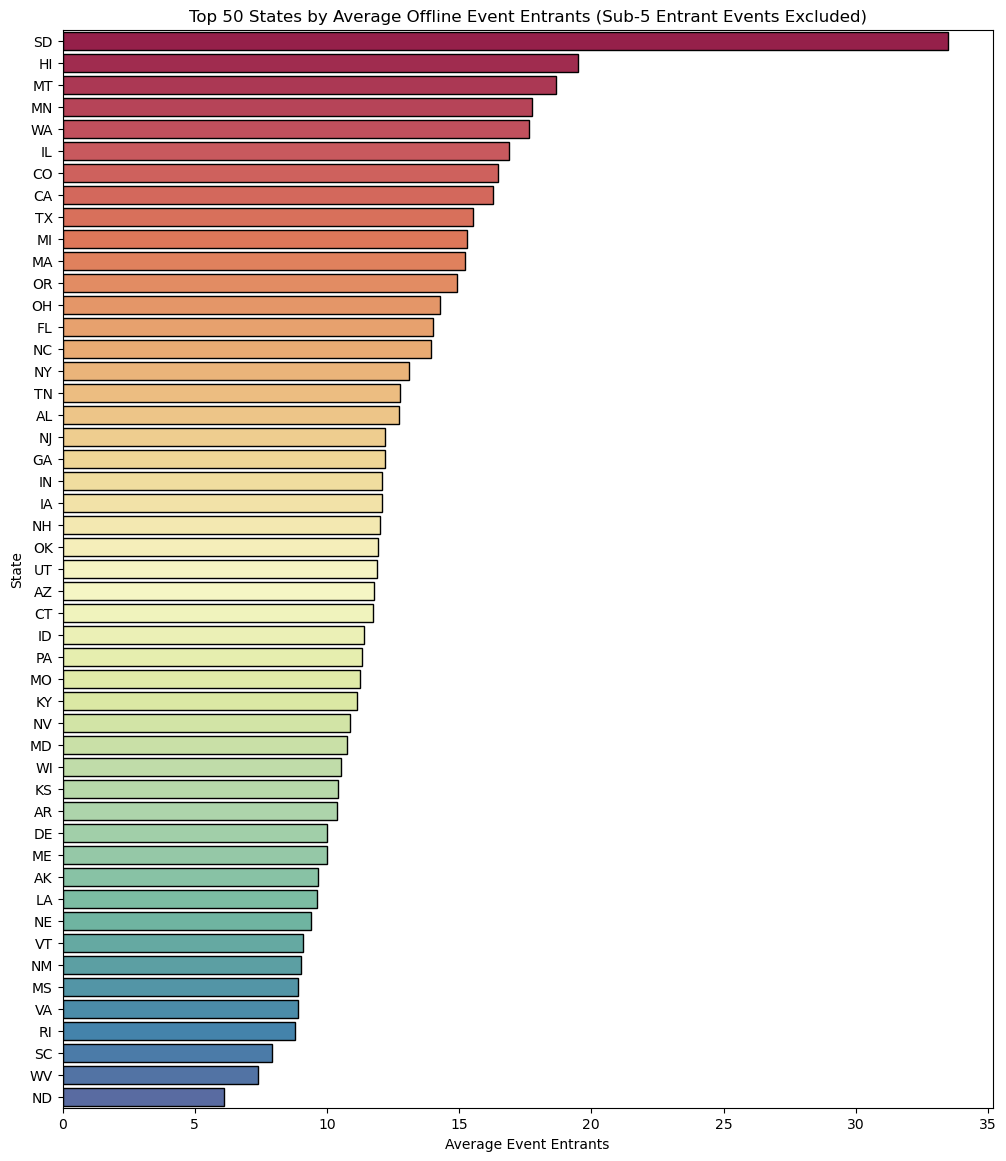

In [110]:
# Some fun visualizations of the geolocation data

# this visualization is the USA states ranked by average tournament entrants with tournaments less than 5 and over 400 entrants excluded
# since there are quite a few tourneys with super low entrants and some states host all the majors, so that would skew it higher (those tournaments usually have over 500 entrants)
# list of the states with their two letter codes
states_50 = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

# filtering out 'Online' events and non-USA states
offline_usa_tournaments = GGST_Data[(GGST_Data['tournament online'] == False) & 
                                    GGST_Data['tournament state'].isin(states_50) &
                                   (GGST_Data['event entrants'] > 4) &
                                   (GGST_Data['event entrants'] < 401)]

# by 'tournament state' and average 'event entrants'
state_entrants_avg = offline_usa_tournaments.groupby('tournament state')['event entrants'].mean().reset_index()

# sort by average entrants
state_entrants_avg_sorted = state_entrants_avg.sort_values(by='event entrants', ascending=False)

state_entrants_avg_top = state_entrants_avg_sorted.head(50)

plt.figure(figsize=(12, 14))
sns.barplot(
    x='event entrants',
    y='tournament state',
    data=state_entrants_avg_top,
    palette=sns.color_palette("Spectral", n_colors=50),  # Using a palette with 50 distinct colors
    edgecolor='black'  # Adding a black edge to each bar for better visibility
)
plt.title('Top 50 States by Average Offline Event Entrants (Sub-5 Entrant Events Excluded)')
plt.xlabel('Average Event Entrants')
plt.ylabel('State')
plt.show()

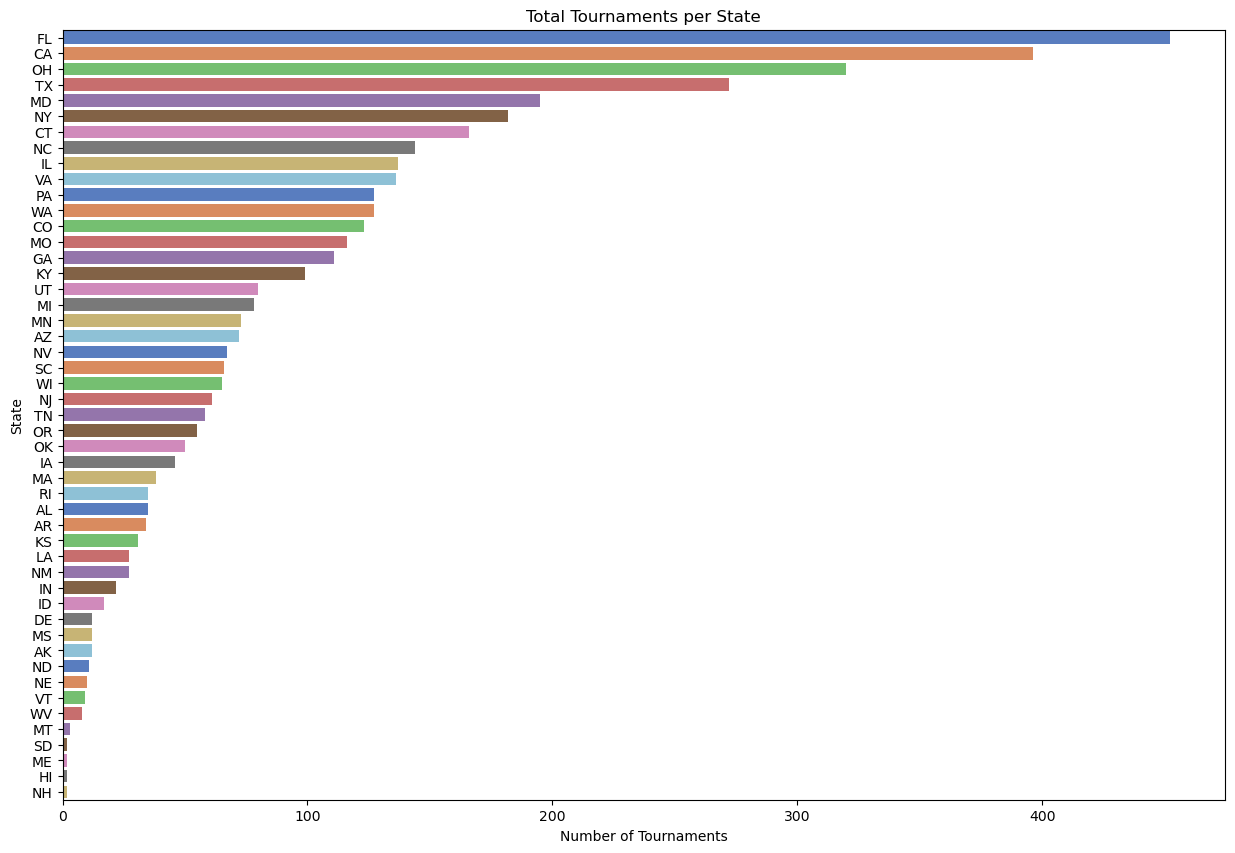

In [111]:
# total offline tournaments per state with 5 or more entrants

AAA = GGST_Data[(GGST_Data['tournament online'] == False) &  
                                    GGST_Data['tournament state'].isin(states_50) &
                                   (GGST_Data['event entrants'] > 4)]

tournament_count_per_state = AAA['tournament state'].value_counts()

plt.figure(figsize=(15, 10))
sns.barplot(y=tournament_count_per_state.index, x=tournament_count_per_state.values, palette='muted')
plt.title('Total Tournaments per State')
plt.xlabel('Number of Tournaments')
plt.ylabel('State')
plt.show()

In [112]:
# back to cleaning, you must forgive me for the seeming randomness of this, I am combining a few different notebooks i was working on into one and it's not the most cohesive thing ever
GGST_Combined.sample(10)

,event id,set id,loser placement,winner placement,winner id,player 1 id,player 1 name,player 1 seed,player 1 victory,player 2 id,player 2 name,player 2 seed,player 2 victory,event entrants,event game,tournament_id,tournament name,tournament city,tournament state,tournament country,tournament start timestamp,tournament online,tournament num attendees
1146,1091390,71930461,129,97,15935220,15935220,CanPakes,159,True,15932474,layne,202,False,230,Guilty Gear: Strive,645039,TNS Guilty Gear Strive #108,Online,Online,Online,2024-03-11 19:00:00,True,231
291032,761497,51963136,17,5,11135130,11135130,Ata,4,True,11059087,TRC | vilajur,13,False,37,Guilty Gear: Strive,467460,Fist'22 - Fighting İstanbul!,Online,İstanbul,TR,2022-09-15 17:00:00,False,113
86447,987927,65509207,3,2,14358415,14323866,Sharpkarp,3,False,14358415,FGL | dqflynn,2,True,14,Guilty Gear: Strive,591762,Ifight S3 Fall LAN,Urbana,IL,US,2023-09-23 12:00:00,False,18
239277,835593,55446367,13,13,11948668,11948668,POTEMKIN | _-666_DL,53,True,11953371,TopLad | Patriarch Panda,21,False,59,Guilty Gear: Strive,508240,9Moons POTEMKIN ONLY Tournament,Online,Online,Online,2022-12-29 18:00:00,True,59
143404,924423,61369948,9,3,13385201,13362512,igorjml,3,False,13385201,Razor,6,True,10,Guilty Gear: Strive,556951,Semanal Ultra Arcade #72,Savassi,MG,BR,2023-06-10 07:00:00,False,27
210628,856916,57144363,5,4,12386576,12357560,FAMILY | DerekthePineapple,5,False,12386576,Aya,7,True,12,Guilty Gear: Strive,519871,CouchWarriors VIC February Ranking Battle (202...,Online,VIC,AU,2023-02-17 18:00:00,False,69
195822,872545,58052606,8,4,12595897,12536452,Dardman117,5,False,12595897,Baredor,10,True,10,Guilty Gear: Strive,528266,Brantford Beatdown #1,Brantford,ON,CA,2023-03-12 15:15:00,False,21
11693,1065812,71127753,7,5,15745972,15753379,Enaid,7,False,15745972,雷賓 | Adam,6,True,7,Guilty Gear: Strive,632203,Thursday Throwdown 85| @The Hub,Milwaukee,WI,US,2024-02-22 19:00:00,False,49
259178,802144,54057308,17,9,11425998,11425998,Limland,47,True,11592138,Sasafrase,39,False,112,Guilty Gear: Strive,489557,Ember's Monthly Charity Clash #3 for Trans Lif...,Online,Online,Online,2022-11-11 20:00:00,True,112
244896,829699,55098925,17,13,11882702,11882702,DH | Fidel Stix,13,True,11879557,I.M.P | Shinhua,23,False,32,Guilty Gear: Strive,504878,YOMI74,Richardson,TX,US,2022-12-14 20:30:00,False,45


In [113]:
# this column is redundent because all this data is from GGST (Guilty Gear Strive)

GGST_Combined = GGST_Combined.drop(columns=['event game'])

In [118]:
Score_Data.sample(5)

,set id,player 1 id,player 1 wins,player 2 id,player 2 wins
10690,71118115,2296351,3.0,13879,0.0
202289,56420664,1673839,3.0,2714243,0.0
72503,66146763,182806,1.0,533866,3.0
171324,58521292,2624968,3.0,2699166,0.0
15766,70643745,2695977,3.0,1624381,2.0


In [119]:
searching = GGST_Combined[GGST_Combined['set id'] == 1727136]     

searching

,event id,set id,loser placement,winner placement,winner id,player 1 id,player 1 name,player 1 seed,player 1 victory,player 2 id,player 2 name,player 2 seed,player 2 victory,event entrants,tournament_id,tournament name,tournament city,tournament state,tournament country,tournament start timestamp,tournament online,tournament num attendees


In [120]:
Score_Data.sample(5)

,set id,player 1 id,player 1 wins,player 2 id,player 2 wins
202164,56443023,897563,2.0,2978245,0.0
115721,62787956,259783,3.0,2847179,0.0
123544,62057611,3233749,3.0,1565588,0.0
167221,58734340,3198702,0.0,3135962,3.0
65260,66676495,3594753,1.0,3594774,2.0


In [121]:
GGST_Combined.shape

(294063, 22)

In [145]:
Set_Data.shape

(294063, 13)

In [123]:
GGST_Combined = GGST_Combined.rename(columns={'player 1 id': 'player 1 id old'})
GGST_Combined = GGST_Combined.rename(columns={'player 2 id': 'player 2 id old'})

In [124]:
FINAL_DATA = pd.merge(GGST_Combined, Score_Data, on='set id')

In [146]:
FINAL_DATA.shape

(268425, 24)

In [126]:
FINAL_DATA.sample(8)

,event id,set id,loser placement,winner placement,winner id,player 1 id old,player 1 name,player 1 seed,player 1 victory,player 2 id old,player 2 name,player 2 seed,player 2 victory,event entrants,tournament_id,tournament name,tournament city,tournament state,tournament country,tournament start timestamp,tournament online,tournament num attendees,player 1 id,player 1 wins,player 2 id,player 2 wins
142128,913559,60477298,9,3,13173714,13181216,ReaperMeister,3,False,13173714,D3WDify,6,True,12,550659,0-2uesdays Vol. 55 - May 16th,Fullerton,CA,US,2023-05-16 20:30:00,False,12,697177,1.0,2048453,3.0
213399,836165,55757809,5,3,12024906,12006745,RCK BTTM | freeter,5,False,12024906,KapralWojtek,10,True,12,508569,Retro Revival 01/11/23,Winter Park,FL,US,2023-01-11 18:00:00,False,21,10095,2.0,2659409,3.0
25267,1058804,69717037,4,1,15387658,15378500,Ice Dew,1,False,15387658,Night Persona,4,True,12,628656,Sooner Dojo #17,Norman,OK,US,2024-01-19 20:00:00,False,37,2517866,2.0,2947755,3.0
267447,773484,51789702,17,13,11084515,11084044,UnbreakableDoof,48,False,11084515,Myzisco,27,True,77,474258,Shut Up and Fight! Series #4: Wake Me Up When ...,Online,Online,Online,2022-09-11 16:00:00,True,77,591857,1.0,2490165,3.0
192224,850006,57103973,7,5,12344004,12344004,ROR2000,4,True,12343670,MCorp | Altrex,8,False,13,516023,PFL - Ranking # 8 - Road to EVO 2K23,Paris,IDF,FR,2023-02-17 12:30:00,False,28,2332629,3.0,1991700,0.0
257577,787640,52441076,2,1,11250622,11250622,6f_réactable | Onii =D,1,True,11251203,Blacknat,4,False,5,481887,GAMING Weekly #61,Lausanne,VD,CH,2022-09-29 10:00:00,False,35,468757,3.0,1092354,0.0
152709,892812,59624787,2,1,12976357,12974251,Albertdoug,6,False,12976357,TiMiDz,38,True,38,539408,Stairway to Heaven - II,Online,Online,Online,2023-04-22 14:30:00,True,38,2398228,NaN,2325693,NaN
183829,867391,57649309,18,13,12464206,12506022,Diamondrouter,78,False,12464206,STG | Skull_Duggers,2,True,141,525424,RUN IT THURSDAYS #32 - Guilty Gear -Strive-,Online,Online,Online,2023-03-02 18:00:00,True,208,2704316,1.0,3008055,3.0


In [127]:
TEMP = GGST_Combined['player 1 name'].unique()
TEMP.shape

(31095,)

In [128]:
# # TOP 50 PLAYERS BY WIN COUNT

# # Determine the winner of each set
# FINAL_DATA['calculated winner id'] = FINAL_DATA.apply(lambda row: row['player 1 id'] if row['player 1 wins'] > row['player 2 wins'] else row['player 2 id'], axis=1)

# # Create a DataFrame with unique player ids and names
# player_1_data = FINAL_DATA[['player 1 id', 'player 1 name']].drop_duplicates()
# player_2_data = FINAL_DATA[['player 2 id', 'player 2 name']].drop_duplicates()
# player_1_data.columns = ['player id', 'player name']
# player_2_data.columns = ['player id', 'player name']

# # Concatenate the DataFrames and remove any duplicate player ids, keeping the first occurrence
# all_player_data = pd.concat([player_1_data, player_2_data]).drop_duplicates(subset='player id', keep='first')

# # Create a dictionary to map player ids to player names
# player_id_to_name = all_player_data.set_index('player id')['player name'].to_dict()

# # Count the number of wins for each player
# win_counts = FINAL_DATA['calculated winner id'].value_counts().reset_index()
# win_counts.columns = ['player id', 'win_count']

# # Map the player names to the 'player id' in the win_counts DataFrame
# win_counts['player name'] = win_counts['player id'].map(player_id_to_name)

# # Get the top 50 winners
# top_50_winners = win_counts.nlargest(50, 'win_count')


# top_50_winners

In [129]:
# Searching for players via player id
player_search = FINAL_DATA[
    (FINAL_DATA['player 1 id'] == 2346211) | (FINAL_DATA['player 2 id'] == 2346211)
]

player_search

,event id,set id,loser placement,winner placement,winner id,player 1 id old,player 1 name,player 1 seed,player 1 victory,player 2 id old,player 2 name,player 2 seed,player 2 victory,event entrants,tournament_id,tournament name,tournament city,tournament state,tournament country,tournament start timestamp,tournament online,tournament num attendees,player 1 id,player 1 wins,player 2 id,player 2 wins
5269,1088131,71618118,7,2,15823248,15853502,M.RAGE | UMISHO,8,False,15823248,SJS | totsubunger,5,True,60,643389,Slopy Sabbath #7,Online,Online,Online,2024-03-03 19:00:00,True,60,2346211,0.0,3434845,3.0
5273,1088131,71612885,9,7,15853502,15853502,M.RAGE | UMISHO,1,True,15856126,SWEET | MegaRura,19,False,60,643389,Slopy Sabbath #7,Online,Online,Online,2024-03-03 19:00:00,True,60,2346211,3.0,3272088,1.0
5275,1088131,71612758,7,3,15856262,15853502,M.RAGE | UMISHO,1,False,15856262,NH | winty guitar,9,True,60,643389,Slopy Sabbath #7,Online,Online,Online,2024-03-03 19:00:00,True,60,2346211,2.0,1107109,3.0
5300,1088131,71612750,9,7,15853502,15853502,M.RAGE | UMISHO,1,True,15856034,GER | Lakey,16,False,60,643389,Slopy Sabbath #7,Online,Online,Online,2024-03-03 19:00:00,True,60,2346211,3.0,2729273,0.0
5318,1088131,71612734,25,7,15853502,15853502,M.RAGE | UMISHO,1,True,15824276,nano,32,False,60,643389,Slopy Sabbath #7,Online,Online,Online,2024-03-03 19:00:00,True,60,2346211,3.0,982687,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267878,779453,51738676,9,3,11058494,11081368,Razer | UMISHO,1,False,11058494,CptBonesUwU,13,True,113,477477,9Moons Weekly #36 -Guilty Gear -Strive-,Online,Online,Online,2022-09-10 16:00:00,True,113,2346211,2.0,2697441,3.0
267884,779453,51738549,9,5,11079980,11081368,Razer | UMISHO,1,False,11079980,KudoGio,9,True,113,477477,9Moons Weekly #36 -Guilty Gear -Strive-,Online,Online,Online,2022-09-10 16:00:00,True,113,2346211,1.0,1729683,3.0
267933,779453,51738545,17,9,11081368,11081368,Razer | UMISHO,1,True,11074035,Petrafied,17,False,113,477477,9Moons Weekly #36 -Guilty Gear -Strive-,Online,Online,Online,2022-09-10 16:00:00,True,113,2346211,3.0,2040861,0.0
267968,779453,51738537,33,9,11081368,11081368,Razer | UMISHO,1,True,11074046,PineappleHour,33,False,113,477477,9Moons Weekly #36 -Guilty Gear -Strive-,Online,Online,Online,2022-09-10 16:00:00,True,113,2346211,3.0,2897637,0.0


In [131]:
# Update the 'winner id' with the new player ids
FINAL_DATA['winner id'] = FINAL_DATA.apply(lambda row: row['player 1 id'] if row['winner id'] == row['player 1 id old'] else (row['player 2 id'] if row['winner id'] == row['player 2 id old'] else row['winner id']), axis=1)

In [132]:
FINAL_DATA = FINAL_DATA.drop(columns=['player 1 id old'])
FINAL_DATA = FINAL_DATA.drop(columns=['player 2 id old'])

In [133]:
FINAL_DATA = FINAL_DATA.rename(columns={'event entrants': 'ggst entrants'})
FINAL_DATA = FINAL_DATA.rename(columns={'tournament_id': 'tournament id'})

In [134]:
# Top 50 players by set win count by player id

win_counts = FINAL_DATA['winner id'].value_counts().rename('win_count')

win_counts_df = win_counts.reset_index().rename(columns={'index': 'winner id'})

player_names = pd.concat([
    FINAL_DATA[['player 1 id', 'player 1 name']].rename(columns={'player 1 id': 'player id', 'player 1 name': 'player name'}),
    FINAL_DATA[['player 2 id', 'player 2 name']].rename(columns={'player 2 id': 'player id', 'player 2 name': 'player name'})
])

player_names_grouped = player_names.groupby('player id')['player name'].apply(lambda names: '/'.join(names.drop_duplicates()))

top_players = win_counts_df.merge(player_names_grouped, how='left', left_on='winner id', right_index=True)

top_50_players = top_players.head(50)

top_50_players.index = top_50_players.index + 1
top_50_players = top_50_players.rename(columns={'winner id': 'Player ID'})
top_50_players = top_50_players.rename(columns={'player name': 'Player Name(s)'})
top_50_players = top_50_players.rename(columns={'win_count': 'Total Set Wins'})
top_50_players



,Player ID,Total Set Wins,Player Name(s)
1,1727136,1712,DM | Dany/Dany/Lawful Neutral
2,522919,1296,Mikesaftig/mike_Saftig/mike_Saftig / Dany / Ch...
3,689427,979,9Moons | TestYourLuck/TestYourLuck/NE | Testyo...
4,2455503,906,RedIAmNot/TREE | RedIAmNot
5,66010,879,9Moons | Marvelo/Marvelo/SQ / Marvelo / Kreeg/...
6,2361533,860,"SF | Lurry/""Fuzzy"" j.2K/Lurry/GoH | Lurry/? | ..."
7,3021508,791,NH | MjKurase/MjKurase/RS | MjKurase
8,2347689,776,MacMens/GoH | MacMens/VLE | MacMens/VTFGC | Ma...
9,1436932,747,TNS | MFCR/Florida diff/MFCR/9Moons | MFCR/Ner...
10,1946966,673,NH | Aboii/RedIAmNot / Aboii / Tatsuo/Aboii/Wa...


In [135]:
# ADDING TOTAL SET LOSES AND WIN RATE TO TOTAL WINS
win_counts = FINAL_DATA['winner id'].value_counts().rename('win_count')

loss_counts_1 = FINAL_DATA[FINAL_DATA['winner id'] != FINAL_DATA['player 1 id']]['player 1 id'].value_counts()
loss_counts_2 = FINAL_DATA[FINAL_DATA['winner id'] != FINAL_DATA['player 2 id']]['player 2 id'].value_counts()
loss_counts = loss_counts_1.add(loss_counts_2, fill_value=0).rename('loss_count')

win_loss_counts_df = pd.DataFrame({'Total Set Wins': win_counts, 'Total Set Losses': loss_counts}).fillna(0)

win_loss_counts_df['Win Rate'] = win_loss_counts_df['Total Set Wins'] / (win_loss_counts_df['Total Set Wins'] + win_loss_counts_df['Total Set Losses'])

player_names = pd.concat([
    FINAL_DATA[['player 1 id', 'player 1 name']].rename(columns={'player 1 id': 'player id', 'player 1 name': 'Player Name(s)'}),
    FINAL_DATA[['player 2 id', 'player 2 name']].rename(columns={'player 2 id': 'player id', 'player 2 name': 'Player Name(s)'})
])

player_names_grouped = player_names.groupby('player id')['Player Name(s)'].apply(lambda names: '/'.join(names.drop_duplicates()))

win_loss_counts_df = win_loss_counts_df.reset_index().rename(columns={'index': 'Player ID'})

top_players = win_loss_counts_df.merge(player_names_grouped, how='left', left_on='Player ID', right_index=True)

top_50_players = top_players.sort_values('Total Set Wins', ascending=False).reset_index(drop=True)

top_50_players.index = top_50_players.index + 1

top_50_players.head(50)


,Player ID,Total Set Wins,Total Set Losses,Win Rate,Player Name(s)
1,1727136,1712.0,299.0,0.851318,DM | Dany/Dany/Lawful Neutral
2,522919,1296.0,601.0,0.683184,Mikesaftig/mike_Saftig/mike_Saftig / Dany / Ch...
3,689427,979.0,419.0,0.700286,9Moons | TestYourLuck/TestYourLuck/NE | Testyo...
4,2455503,906.0,380.0,0.704510,RedIAmNot/TREE | RedIAmNot
5,66010,879.0,289.0,0.752568,9Moons | Marvelo/Marvelo/SQ / Marvelo / Kreeg/...
6,2361533,860.0,575.0,0.599303,"SF | Lurry/""Fuzzy"" j.2K/Lurry/GoH | Lurry/? | ..."
7,3021508,791.0,363.0,0.685442,NH | MjKurase/MjKurase/RS | MjKurase
8,2347689,776.0,300.0,0.721190,MacMens/GoH | MacMens/VLE | MacMens/VTFGC | Ma...
9,1436932,747.0,199.0,0.789641,TNS | MFCR/Florida diff/MFCR/9Moons | MFCR/Ner...
10,1946966,673.0,344.0,0.661750,NH | Aboii/RedIAmNot / Aboii / Tatsuo/Aboii/Wa...
